In [150]:
#importing all the required libraries and reading the dataset
from matplotlib import pyplot
import nltk
import pandas as pd
import re
import operator
import numpy as np
from nltk.tokenize import word_tokenize
dataset=pd.read_csv('tweets-dataset.csv')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SREEJITH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1.a) Calculating the types,tokens and their ratio(TTR):

In [151]:
# generating all the tokens

tokens=[]
for i in data['Sentence']:
    token=nltk.word_tokenize(i)
    for j in token:
        tokens.append(j)

In [157]:
# calculating the types , this dictionary is used in later sub parts of the question as well

tokencount = 0
types = {}
regex = "[A-Za-z0-9]*"
for token in tokens:
    token = token.lower()
    token = (re.match(regex,token)).group(0)
    if token =="":
        continue;
    tokencount +=1
    if token not in types:
        types[token] = 1
    else:
        types[token] += 1
numtypes = len(types)

In [158]:
#calculating the ttr

ttr = numtypes/tokencount
print("Types=",numtypes)
print("Tokens=", tokencount)
print("Types to Token ratio(TTR)=", ttr)

Types= 36301
Tokens= 313001
Types to Token ratio(TTR)= 0.11597726524835383


# 1.b) Zipfs law for meanings and length

# i)For meanings vs frequency:

In [99]:
# this is obtained from the types dictionary i've created above,which maintains a frequency count of each word
#i've taken 15 random words and calculated their frequenices.

wordfrequency={'the': types['the'],'and':types['and'] ,'right': types['right'] ,'bad': types['bad'] ,'talk': types['talk'] ,
               'hello': types['hello'] ,'hate': types['hate'] ,'politics': types['politics'] ,
               'welcome':types['welcome'],'bye':types['bye'] ,'a':types['a'],'why':types['why'],'no':types['no'],
               'nail':types['nail'], 'man':types['man']} 

In [124]:
# this obtains the number of meanings of each word

wordmeaning={}
for word in wordfrequency:
    wordmeaning[word] = len(wordnet.synsets(word))

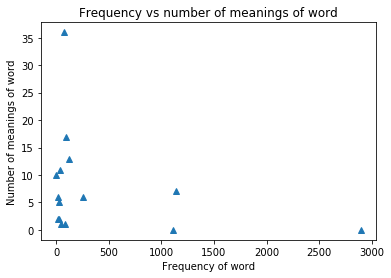

In [140]:
# plotting to check if zipf's law holds true

pyplot.plot(wordfrequency.values(), wordmeaning.values(),'^')
pyplot.title("Frequency vs number of meanings of word")
pyplot.xlabel('Frequency of word')
pyplot.ylabel('Number of meanings of word')
pyplot.show()

# here zipf's law isn't exactly followed since we took random words and checked.

# ii) For length vs frequency:

In [139]:
#calculating the wordlengths and frequencies over all words in the dataset

wordlengths = []
wordfrequencies = []

for key, val in reversed(sorted(types.items(), key = operator.itemgetter(1))):
    wordlengths.append(len(key))
    wordfrequencies.append(val)

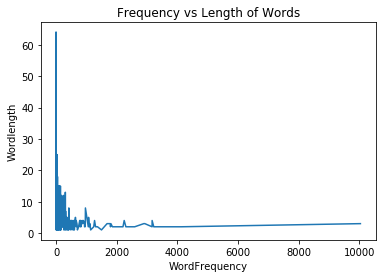

In [159]:
#plotting to check if zipf's law holds true

pyplot.plot(wordfrequencies, wordlengths)
pyplot.title("Frequency vs Length of Words")
pyplot.xlabel('WordFrequency')
pyplot.ylabel('Wordlength')
pyplot.show()

# as we can see from the above graph zipf's law is roughly followed
# word length is inversely proportional to frequency

# 1.c) heap's law

In [169]:
# we calculate the tokens and vocbulary of each sentence individually.

tokenspersegment = []
wordspersegment = []

tokensuptilcurrentsegment = 0
wordsuptilcurrentsegment = {}


for section in dataset.Sentence:
  words = nltk.word_tokenize(section)

  for word in words:
    word = word.lower()
    word = (re.match(regex, word)).group(0)
    if word =="":
        continue;
    tokensuptilcurrentsegment += 1
    if word in wordsuptilcurrentsegment:
      wordsuptilcurrentsegment[word] += 1
    else:
      wordsuptilcurrentsegment[word] = 1

    # We keep track of each sub section's cumulative token count and vocabulary size  
    tokenspersegment.append(tokensuptilcurrentsegment)
    wordspersegment.append(len(wordsuptilcurrentsegment))    

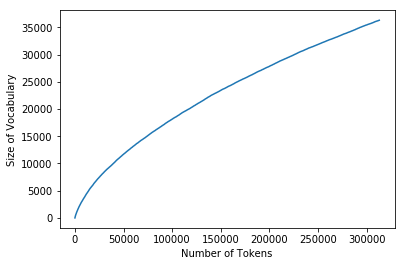

Beta= 0.6619493614001318
K= 8.703686389193297


In [171]:
#we plot to check for heap's law and obtain k and beta respectively from the formula for heap's law

pyplot.plot(tokenspersegment, wordspersegment)
pyplot.xlabel('Number of Tokens')
pyplot.ylabel('Size of Vocabulary')
pyplot.show()
beta,k =np.polyfit(np.log(tokenspersegment),np.log(wordspersegment),1)
print("Beta=", beta)
print("K=", np.exp(k))


# heap's law is verified from the above graph and values for beta and k are obtained 